In [20]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import os
%matplotlib inline

from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, precision_score, recall_score, roc_auc_score
from sklearn.metrics import f1_score, confusion_matrix, precision_recall_curve, roc_curve

os.getcwd()

diabetes = pd.read_csv("pima_indian/diabetes.csv")
print(diabetes["Outcome"].value_counts())
display(diabetes.head(6))

0    500
1    268
Name: Outcome, dtype: int64


,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1
5,5,116,74,0,0,25.6,0.201,30,0


In [21]:
display(diabetes.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 9 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Pregnancies               768 non-null    int64  
 1   Glucose                   768 non-null    int64  
 2   BloodPressure             768 non-null    int64  
 3   SkinThickness             768 non-null    int64  
 4   Insulin                   768 non-null    int64  
 5   BMI                       768 non-null    float64
 6   DiabetesPedigreeFunction  768 non-null    float64
 7   Age                       768 non-null    int64  
 8   Outcome                   768 non-null    int64  
dtypes: float64(2), int64(7)
memory usage: 54.1 KB


None

In [49]:
def get_eval(y_test, pred=None, pred_proba=None):
    accuracy = accuracy_score(y_test , pred)
    precision = precision_score(y_test , pred)
    recall = recall_score(y_test , pred)
    f1 = f1_score(y_test,pred)
    roc_auc = roc_auc_score(y_test, pred_proba)
    confusion = confusion_matrix(y_test,pred)
    print(confusion)
    print('Accuracy: {0:.4f}, Precision: {1:.4f}, Recall: {2:.4f},\
          \nF1: {3:.4f}, AUC:{4:.4f}'.format(accuracy, precision, recall, f1, roc_auc))

In [50]:
def roc_curve_plot(y_test , pred_proba_c1):
    # FPR, TPR
    fprs , tprs , thresholds = roc_curve(y_test ,pred_proba_c1)

    # ROC Curve plot 
    plt.plot(fprs , tprs, label='ROC')
    # Middle Line
    plt.plot([0, 1], [0, 1], 'k--', label='Random')
    
    start, end = plt.xlim()
    plt.xticks(np.round(np.arange(start, end, 0.1),2))
    plt.xlim(0,1); plt.ylim(0,1)
    plt.xlabel('FPR( 1 - Sensitivity )'); plt.ylabel('TPR( Recall )')
    plt.legend()
    plt.show()

In [51]:
X = diabetes.iloc[:, :-1]
Y = diabetes.iloc[:,-1]

X_train,X_test, y_train, y_test =train_test_split(X,Y, test_size=0.2, random_state= 6)

from sklearn.linear_model import LogisticRegression

model = LogisticRegression(solver="liblinear")
model.fit(X_train,y_train)

prediction = model.predict(X_test)
predict_proba = model.predict_proba(X_test)[:,1]

get_eval(y_test, prediction, predict_proba)

[[93 10]
 [20 31]]
Accuracy: 0.8052, Precision: 0.7561, Recall: 0.6078,          
F1: 0.6739, AUC:0.8401


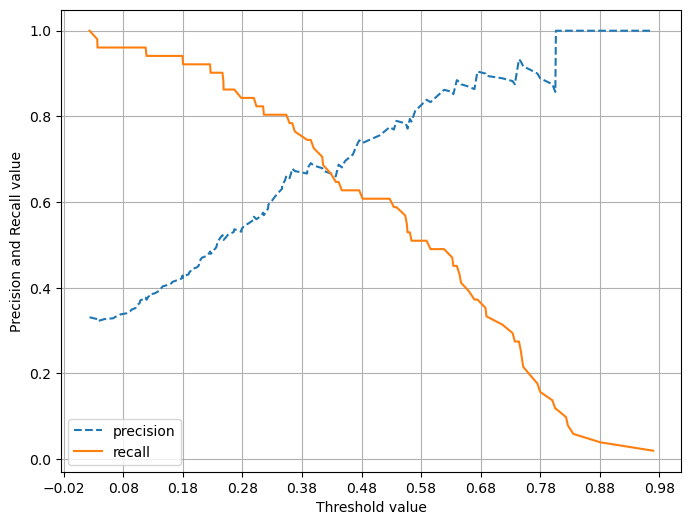

In [54]:
import matplotlib.pyplot as plt
import matplotlib.ticker as ticker
%matplotlib inline

def precision_recall_curve_plot(y_test , pred_proba_c1):
    # threshold ndarray
    precisions, recalls, thresholds = precision_recall_curve( y_test, pred_proba_c1)
    
    plt.figure(figsize=(8,6))
    threshold_boundary = thresholds.shape[0]
    plt.plot(thresholds, precisions[0:threshold_boundary], linestyle='--', label='precision')
    plt.plot(thresholds, recalls[0:threshold_boundary],label='recall')
    
    # threshold 
    start, end = plt.xlim()
    plt.xticks(np.round(np.arange(start, end, 0.1),2))
    
    # label, legned
    plt.xlabel('Threshold value'); plt.ylabel('Precision and Recall value')
    plt.legend(); plt.grid()
    plt.show()
    
precision_recall_curve_plot(y_test, predict_proba)

In [55]:
diabetes.describe()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
count,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000
mean,3.845052,120.894531,69.105469,20.536458,79.799479,31.992578,0.471876,33.240885,0.348958
std,3.369578,31.972618,19.355807,15.952218,115.244002,7.884160,0.331329,11.760232,0.476951
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.078000,21.000000,0.000000
25%,1.000000,99.000000,62.000000,0.000000,0.000000,27.300000,0.243750,24.000000,0.000000
50%,3.000000,117.000000,72.000000,23.000000,30.500000,32.000000,0.372500,29.000000,0.000000
75%,6.000000,140.250000,80.000000,32.000000,127.250000,36.600000,0.626250,41.000000,1.000000
max,17.000000,199.000000,122.000000,99.000000,846.000000,67.100000,2.420000,81.000000,1.000000


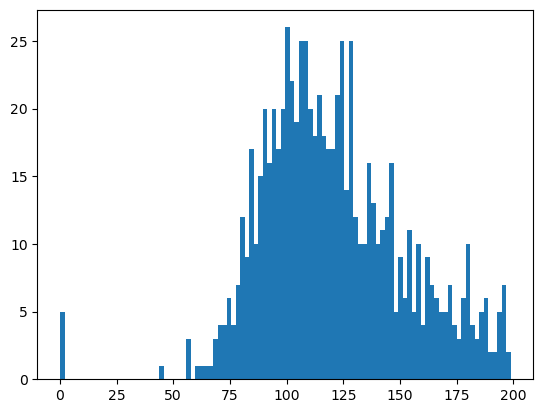

In [57]:
plt.hist(diabetes["Glucose"], bins=100)
plt.show()

In [76]:
features_with_zero = ["Glucose","BloodPressure","SkinThickness","Insulin","BMI"]

total_data_size = diabetes.shape[0]

for feature in features_with_zero:
    zero_count = diabetes[diabetes[feature]==0][feature].count()
    print("# of zeros in {0:}: {1:}, percentage: {2:.2f}".format(feature,zero_count,zero_count/total_data_size))

# of zeros in Glucose: 5, percentage: 0.01
# of zeros in BloodPressure: 35, percentage: 0.05
# of zeros in SkinThickness: 227, percentage: 0.30
# of zeros in Insulin: 374, percentage: 0.49
# of zeros in BMI: 11, percentage: 0.01


In [79]:
diabetes[features_with_zero]= diabetes[features_with_zero].replace(0, diabetes[features_with_zero].mean())

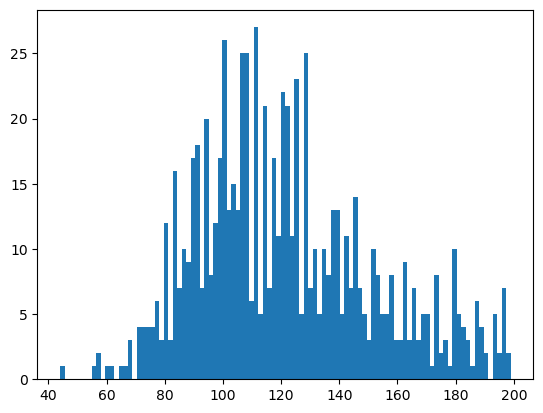

In [80]:
plt.hist(diabetes["Glucose"], bins=100)
plt.show()

In [85]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

X_train, X_test, y_train, y_test = train_test_split(X_scaled, Y, test_size=0.2, random_state=6)

model.fit(X_train,y_train)

prediction = model.predict(X_test)
predict_proba = model.predict_proba(X_test)[:,1]

get_eval(y_test, prediction, predict_proba)

[[90 13]
 [19 32]]
Accuracy: 0.7922, Precision: 0.7111, Recall: 0.6275,          
F1: 0.6667, AUC:0.8365


In [106]:
from sklearn.preprocessing import Binarizer
def get_eval_by_threshold(y_test , pred_proba_c1, thresholds):
    for custom_threshold in thresholds:
        binarizer = Binarizer(threshold=custom_threshold).fit(pred_proba_c1) 
        custom_predict = binarizer.transform(pred_proba_c1)
        print('Threshold:',custom_threshold)
        get_eval(y_test , custom_predict, pred_proba_c1)

thresholds = np.arange(0.3,0.51, 0.03)
pred_proba = model.predict_proba(X_test)[:,1]
get_eval_by_threshold(y_test, pred_proba.reshape(-1,1), thresholds)


Threshold: 0.3
[[77 26]
 [10 41]]
Accuracy: 0.7662, Precision: 0.6119, Recall: 0.8039,          
F1: 0.6949, AUC:0.8365
Threshold: 0.32999999999999996
[[79 24]
 [10 41]]
Accuracy: 0.7792, Precision: 0.6308, Recall: 0.8039,          
F1: 0.7069, AUC:0.8365
Threshold: 0.35999999999999993
[[83 20]
 [11 40]]
Accuracy: 0.7987, Precision: 0.6667, Recall: 0.7843,          
F1: 0.7207, AUC:0.8365
Threshold: 0.3899999999999999
[[85 18]
 [17 34]]
Accuracy: 0.7727, Precision: 0.6538, Recall: 0.6667,          
F1: 0.6602, AUC:0.8365
Threshold: 0.4199999999999999
[[87 16]
 [17 34]]
Accuracy: 0.7857, Precision: 0.6800, Recall: 0.6667,          
F1: 0.6733, AUC:0.8365
Threshold: 0.44999999999999984
[[89 14]
 [19 32]]
Accuracy: 0.7857, Precision: 0.6957, Recall: 0.6275,          
F1: 0.6598, AUC:0.8365
Threshold: 0.4799999999999998
[[90 13]
 [19 32]]
Accuracy: 0.7922, Precision: 0.7111, Recall: 0.6275,          
F1: 0.6667, AUC:0.8365
Threshold: 0.5099999999999998
[[90 13]
 [19 32]]
Accuracy: 0.7922, 

In [101]:
thresholds[-2]

0.4799999999999998

In [108]:
binarizer = Binarizer(threshold= 0.48)

new_pred = binarizer.fit_transform(pred_proba.reshape(-1,1))

get_eval(y_test, new_pred, pred_proba.reshape(-1,1))

[[90 13]
 [19 32]]
Accuracy: 0.7922, Precision: 0.7111, Recall: 0.6275,          
F1: 0.6667, AUC:0.8365
